In [ ]:
import os
import DFA
import cv2
import numpy as np
import Utils
import matplotlib.pyplot as plt
model_segmeta = Utils.unet_segmenta()
pp = Utils.preporcesing(model_segmeta)
import seaborn as sns

# Crea carpeta para guardar Funciones de Fluctuación
os.makedirs('FFS', exist_ok=True)

data = np.load('Data\Set_Database\Data_2.npz')
ids = data['ids']

c:\Users\jygar\Documents\Classification-of-X-rays-using-lung-segmentation-and-MF-DFA\DFA.py:233: RuntimeWarning: divide by zero encountered in power
  dentred_fluctuation = np.mean(np.array(F)**(q))**(1.0/q)
c:\Users\jygar\Documents\Classification-of-X-rays-using-lung-segmentation-and-MF-DFA\DFA.py:235: RuntimeWarning: divide by zero encountered in log10
  self.F_q_log[j].append(np.log10(dentred_fluctuation))
c:\Users\jygar\Documents\Classification-of-X-rays-using-lung-segmentation-and-MF-DFA\DFA.py:233: RuntimeWarning: divide by zero encountered in reciprocal
  dentred_fluctuation = np.mean(np.array(F)**(q))**(1.0/q)
c:\Users\jygar\Documents\Classification-of-X-rays-using-lung-segmentation-and-MF-DFA\DFA.py:228: RuntimeWarning: divide by zero encountered in log
  dentred_fluctuation = np.exp(np.mean(np.log(np.array(F))))
c:\Users\jygar\Documents\Classification-of-X-rays-using-lung-segmentation-and-MF-DFA\DFA.py:230: RuntimeWarning: divide by zero encountered in log10
  self.F_q_log[j]

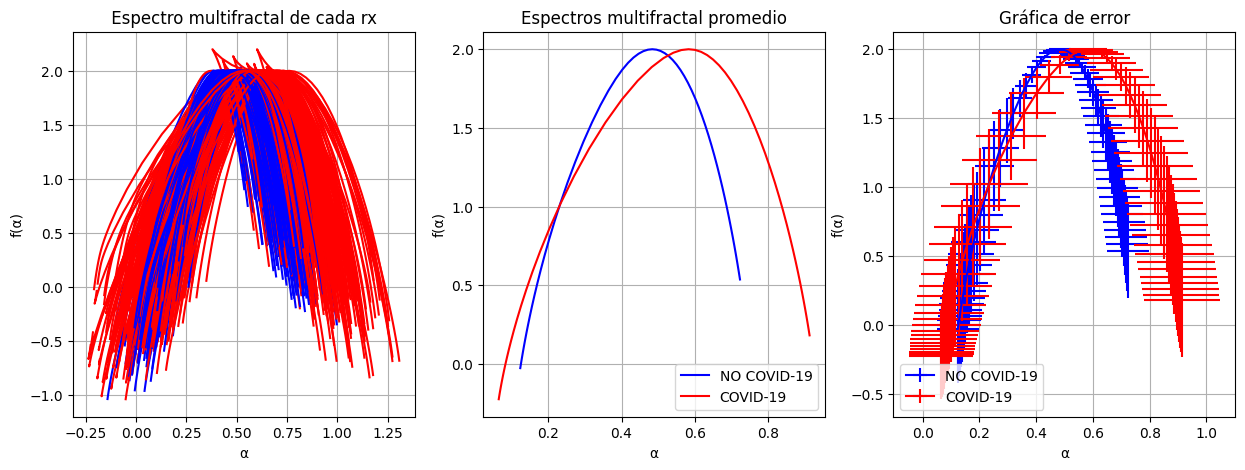

In [ ]:
name_FF = 'FF10'
n_exp = 2
min_size = 6
max_size = False
errores = []

a_covid = []; f_covid = []; a_normal = []; f_normal = []
X = [];y = []; label_y = []
path_FF1 = os.path.join('FFS', name_FF , 'FF')
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.grid()
plt.xlabel('α')
plt.ylabel('f(α)')
plt.title(' Espectro multifractal de cada rx ')

h_covid = []
h_nocovid = []

for id in os.listdir(path_FF1):

    path_id = os.path.join(path_FF1, id)
    data = np.load(path_id, allow_pickle=True)
    data = data['data'].item()
    FF = data['FF']
    box_sizes = data['box_sizes']
    
    DFA_img = DFA.MF_DFA_2D(FF = FF, box_sizes = box_sizes)
    DFA_img.FF_to_spectrum(lim_q= [-15,15], dq=.5, min_size= min_size, max_size= max_size)
    # DFA_img.FF_to_spectrum(lim_q= Q, dq=dqs, min_size= min_size, max_size= max_size)
    features_name, features_vals = DFA_img.Features()
    
    if np.max(DFA_img.a) < 4.01:
        X.append(features_vals)

        # ff_val = features_vals[:-3]
        # ff_val.append(features_vals[-2])
        # X.append(ff_val)
        if 'Covid' in id:
            
            plt.plot(DFA_img.a, DFA_img.f, 'r')
            a_covid.append(DFA_img.a)
            f_covid.append(DFA_img.f)
            y.append(1)
            label_y.append('COVID-19')
            h_covid.append(DFA_img.holder)
            
        else:
            
            plt.plot(DFA_img.a, DFA_img.f, 'b')
            a_normal.append(DFA_img.a)
            f_normal.append(DFA_img.f)
            y.append(0)
            label_y.append('NO COVID-19')
            h_nocovid.append(DFA_img.holder)
        
    else:
        errores.append(DFA_img)


plt.subplot(1,3,2)
plt.plot(np.mean(a_normal, axis=0), np.mean(f_normal, axis=0), 'b', label = 'NO COVID-19')
plt.plot(np.mean(a_covid, axis=0), np.mean(f_covid, axis=0), 'r', label = 'COVID-19')
plt.legend()
plt.grid()
plt.xlabel('α')
plt.ylabel('f(α)')
plt.title('Espectros multifractal promedio')

plt.subplot(1,3,3)
plt.errorbar(x=np.mean(a_normal, axis=0), y=np.mean(f_normal, axis=0), xerr=np.std(a_normal, axis=0), yerr=np.std(f_normal, axis=0), label = 'NO COVID-19', color = 'blue')
plt.errorbar(x=np.mean(a_covid, axis=0), y=np.mean(f_covid, axis=0), xerr=np.std(a_covid, axis=0), yerr=np.std(f_covid, axis=0), label = 'COVID-19', color = 'red')
plt.legend()
plt.xlabel('α')
plt.ylabel('f(α)')
plt.title('Gráfica de error')
plt.grid()
plt.show()


In [ ]:
np.savez('Features',X = X, y = y, label_y = label_y, features_name = features_name)

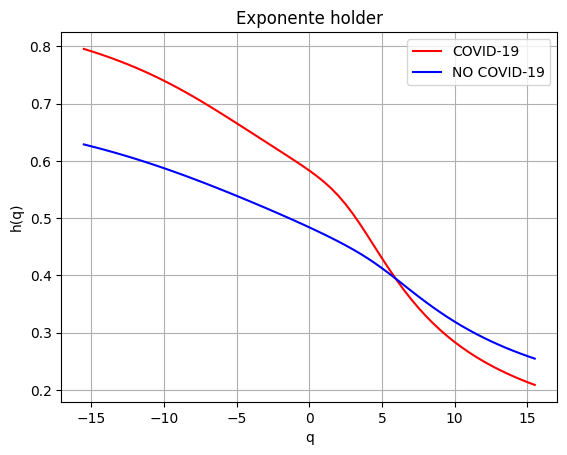

In [ ]:
plt.plot(DFA_img.Q, np.mean(h_covid, axis = 0),  'r', label = 'COVID-19')
plt.plot(DFA_img.Q, np.mean(h_nocovid, axis = 0), 'b', label = 'NO COVID-19')
plt.xlabel('q')
plt.ylabel('h(q)')
plt.grid()
plt.title('Exponente holder')
plt.legend()
plt.show()

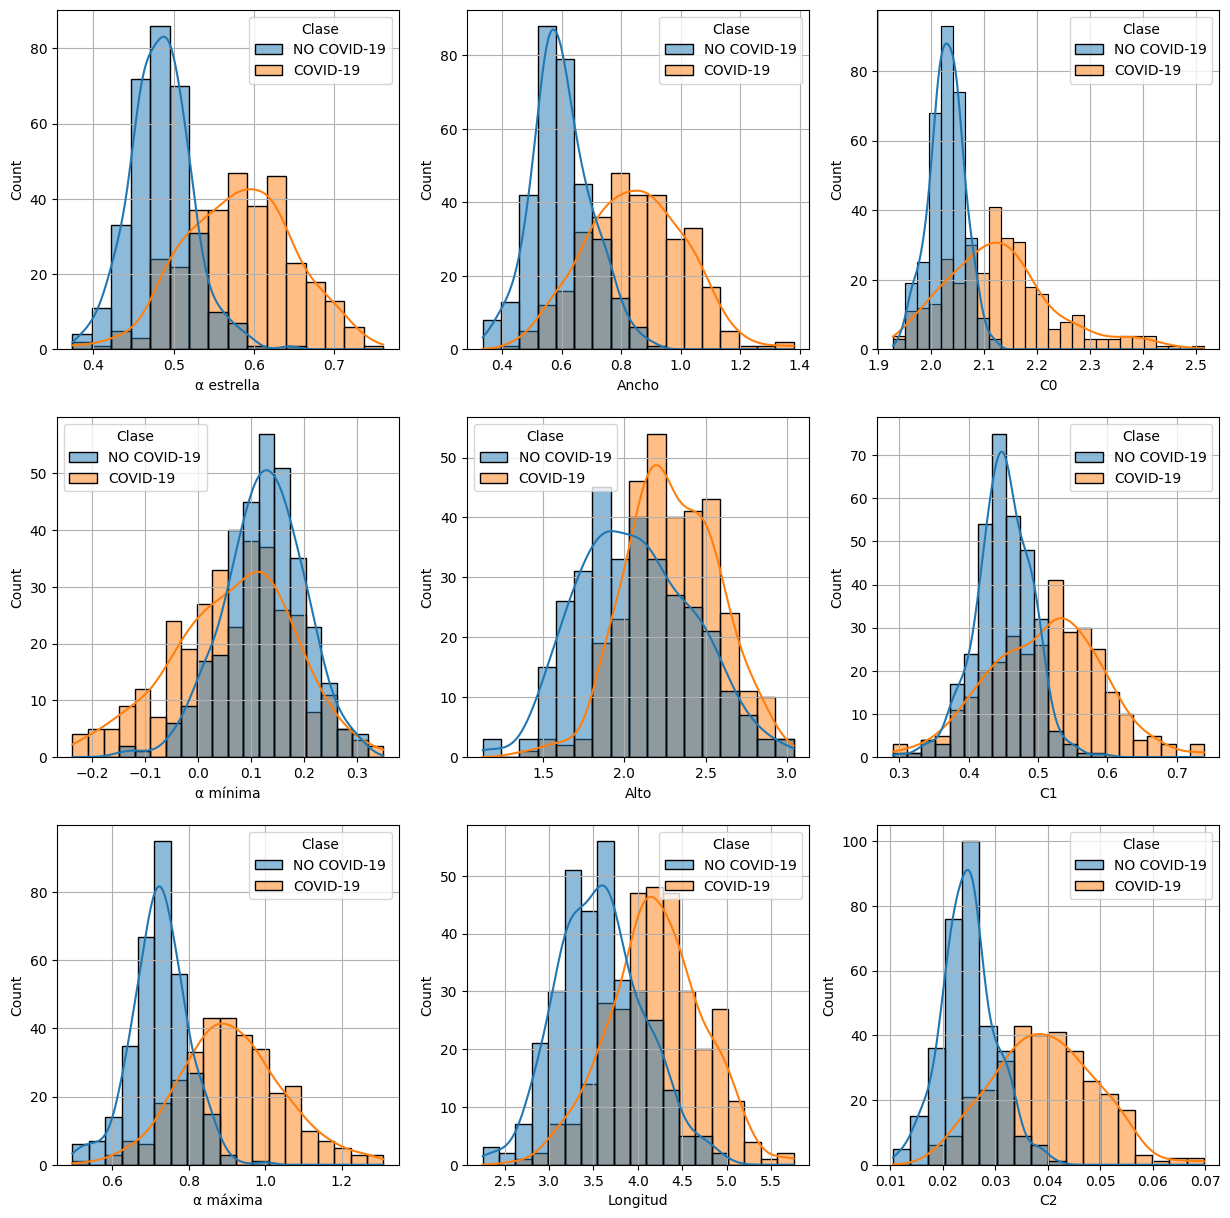

In [ ]:
Features = np.array(X).T
nombres = ['α estrella','α mínima', 'α máxima', 'Ancho', 'Alto', 'Longitud', 'C0', 'C1', 'C2']
data = {}
for feature, name in zip(Features, nombres):
    data[name] = feature
data['Clase'] = label_y
pd_data = pd.DataFrame(data)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize = [15,15])

x=0;y=0
for column, nombre in zip(list(data.keys())[:-1], nombres):
    if x == 3: 
        x = 0
        y += 1
    ax[x,y].grid()
    # ax[x,y].set_title(nombre)
    sns.histplot(data=pd_data, x=column, hue="Clase", kde=True, ax = ax[x,y])
    
    
    x += 1
    

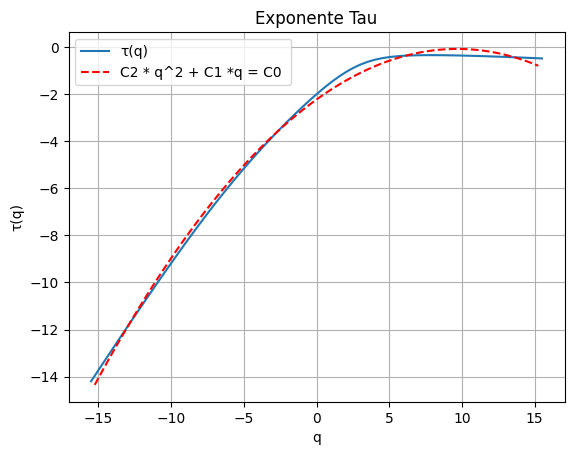

In [ ]:
plt.plot(DFA_img.Q, DFA_img.tau, label = 'τ(q)')
C2,C1,C0 = np.polyfit(DFA_img.Q,DFA_img.tau,2)

model = np.polyfit(DFA_img.Q,DFA_img.tau,2)
model = np.poly1d(model)
x = np.linspace(-15.25,15.25,100)
y = model(x)
plt.plot(x,y, '--r', label = 'C2 * q^2 + C1 *q + C0 ')
plt.legend()

plt.grid()
plt.xlabel('q')
plt.ylabel('τ(q)')
plt.title('Exponente Tau')
plt.show()

In [ ]:
# Características COVID-19
desc_data_covid = {}
desc_data_covid['Característica'] = []
desc_data_covid['Mínimo'] = []
desc_data_covid['Máximo'] = []
desc_data_covid['Media'] = []
desc_data_covid['Desviación estándar'] = []

for column, nombre in zip(list(data.keys())[:-1], nombres):
    feature = pd_data[pd_data['Clase'] == 'COVID-19'][column]
    # feature_normal = pd_data[pd_data['Clase'] == 'NO COVID-19'][column]

    desc_data_covid['Característica'].append(nombre)
    desc_data_covid['Mínimo'].append(np.round(np.min(feature), 3))
    desc_data_covid['Máximo'].append(np.round(np.max(feature), 3))
    desc_data_covid['Media'].append(np.round(np.mean(feature), 3))
    desc_data_covid['Desviación estándar'].append(np.round(np.std(feature), 3))

df_desc_data_covid = pd.DataFrame(desc_data_covid)
df_desc_data_covid.to_csv(f'Experiments\\Experimento{n_exp}_COVID-19.csv')

In [ ]:
# Características NO COVID-19
desc_data = {}
desc_data['Característica'] = []
desc_data['Mínimo'] = []
desc_data['Máximo'] = []
desc_data['Media'] = []
desc_data['Desviación estándar'] = []

for column, nombre in zip(list(data.keys())[:-1], nombres):
    feature = pd_data[pd_data['Clase'] == 'NO COVID-19'][column]

    desc_data['Característica'].append(nombre)
    desc_data['Mínimo'].append(np.round(np.min(feature), 3))
    desc_data['Máximo'].append(np.round(np.max(feature), 3))
    desc_data['Media'].append(np.round(np.mean(feature), 3))
    desc_data['Desviación estándar'].append(np.round(np.std(feature), 3))

df_desc_data = pd.DataFrame(desc_data)
df_desc_data.to_csv(f'Experiments\\Experimento{n_exp}_NO COVID-19.csv')